In [23]:
import numpy
from matplotlib import pyplot

%matplotlib inline

In [24]:
L = 0.01
nx, ny = 21, 21
dx = L/(nx-1)
dy = L/(ny-1)

x = numpy.linspace(0.0, L, num=nx)
y = numpy.linspace(0.0, L, num=nx)

alpha = 1e-4
T0 = numpy.full((ny, nx), 20.0)
T0[0,:] = 100.0 # bottom boundaary
T0[:,0] = 100.0 # left boudnary

In [38]:
def ftcs(T0, nt, dt, dx, dy, alpha, qx=0.0, qy=0.0):
    
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    ny, nx = T.shape
    I, J = nx//2, ny//2 

    for n in range(nt):
        T[1:-1, 1:-1] = (T[1:-1,1:-1] + sigma_x *
                        (T[1:-1,:-2] - 2 * T[1:-1, 1:-1] + T[1:-1,2:])+
                        sigma_y *
                        (T[:-2,1:-1] - 2 * T[1:-1, 1:-1] + T[2:,1:-1]))
        # Update boudary for the Nuemann condition
        T[:, -1] = T[:, -2] + qx * dx # right boundary
        T[-1, :] = T[-2, :] + qy * dy # boundary boundary
        if T[J,I] >= 70.0:
            break
    print(n+1, T[J,I])
    return T

In [39]:
nt = 500
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha

T = ftcs(T0, nt, dt, dx, dy, alpha)

256 70.02138294076661


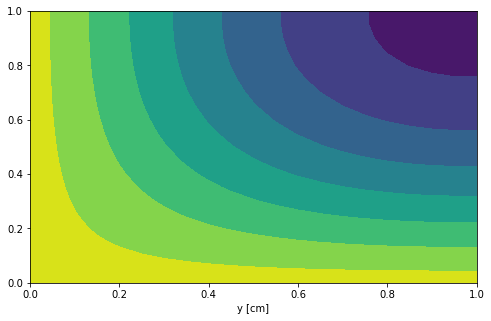

In [40]:
pyplot.figure(figsize=(8.0, 5.0))
pyplot.xlabel('x [cm]')
pyplot.xlabel('y [cm]')
pyplot.contourf(x * 100, y * 100, T);
